In [1]:
from Bio import SeqIO
import pandas as pd

### metadata


In [3]:
# Load dataset
fasta_file_path = "../dataset/1Jan2025_genomes.fa"
sequences = list(SeqIO.parse(fasta_file_path, "fasta"))

In [4]:
sequences[0]

SeqRecord(seq=Seq('TTTGGTGGAGCTGGCGGGAGTTGAACCCGCGTCCGAAATTCCTACATACCATTT...CAT'), id='AY319521', name='AY319521', description='AY319521 Salmonella phage SopEPhi, complete sequence.', dbxrefs=[])

In [6]:
seq_lengths = [len(str(seq.seq)) for seq in sequences]
summary = pd.Series(seq_lengths).describe()
summary

count     32043.000000
mean      60215.966607
std       55524.968903
min        1761.000000
25%       33532.500000
50%       44866.000000
75%       67557.500000
max      735411.000000
dtype: float64

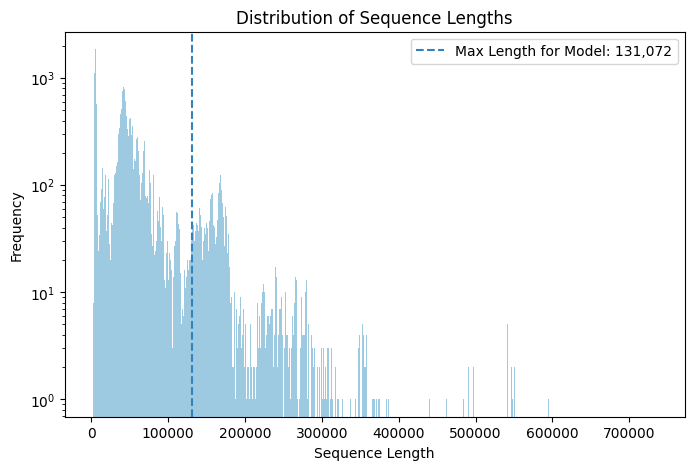

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(seq_lengths, color="#9ecae1", bins=1000)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.yscale("log")
# add a line for the model's expected max length: 131072
plt.axvline(x=131072, color="#3182bd", linestyle="--", label="Max Length for Model: 131,072")
plt.legend()
plt.show()

In [63]:
metadata = pd.read_csv("../dataset/metadata.tsv", sep="\t")

In [64]:
metadata.shape

(32043, 27)

In [65]:
metadata.head()

,Accession,Description,Classification,Genome Length (bp),Jumbophage,molGC (%),Molecule,Modification Date,Number CDS,Positive Strand (%),...,Sub-family,Family,Order,Class,Phylum,Kingdom,Realm,Baltimore Group,Genbank Division,Isolation Host (beware inconsistent and nonsense values)
0,AY319521,Salmonella phage SopEPhi,Salmonella phage SopEPhi Felsduovirus SopEphi ...,35155,False,51.321,DNA,22-MAR-2024,45,82.222222,...,Unclassified,Peduoviridae,Unclassified,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,SYN,Salmonella enterica subsp. enterica serovar Ty...
1,MW175890,Dompiswa phage TSP7_1,Dompiswa phage TSP7_1 Phapecoctavirus TSP7 Pha...,150892,False,39.115,DNA,10-JAN-2024,272,49.632353,...,Stephanstirmvirinae,Unclassified,Unclassified,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,ENV,Unspecified
2,GU339467,Mycobacterium phage RedRock,Mycobacterium phage RedRock Fromanvirus redroc...,53332,False,64.530,DNA,29-AUG-2023,90,40.000000,...,Unclassified,Unclassified,Unclassified,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,ENV,Unspecified
3,MF417929,Uncultured Caudovirales phage clone 2F_1,Uncultured Caudovirales phage clone 2F_1 Bracc...,32618,False,39.218,DNA,01-NOV-2022,42,16.666667,...,Unclassified,Peduoviridae,Caudovirales,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,ENV,Unspecified
4,MH616963,crAssphage sp. isolate ctbg_1,crAssphage sp. isolate ctbg_1 Whopevirus anima...,94878,False,28.507,DNA,25-OCT-2022,89,56.179775,...,Crudevirinae,Intestiviridae,Crassvirales,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,ENV,Unspecified


In [66]:
print(metadata.columns)

Index(['Accession', 'Description', 'Classification', 'Genome Length (bp)',
       'Jumbophage', 'molGC (%)', 'Molecule', 'Modification Date',
       'Number CDS', 'Positive Strand (%)', 'Negative Strand (%)',
       'Coding Capacity (%)', 'Low Coding Capacity Warning', 'tRNAs', 'Host',
       'Lowest Taxa', 'Genus', 'Sub-family', 'Family', 'Order', 'Class',
       'Phylum', 'Kingdom', 'Realm', 'Baltimore Group', 'Genbank Division',
       'Isolation Host (beware inconsistent and nonsense values)'],
      dtype='object')


### metadata cleaning


In [67]:
metadata = metadata[["Accession", "Genus", "Family", "Host", "Genome Length (bp)"]]

In [69]:
# exclude rows with "Host" column as "Unspecified", "Genus" as "Unclassified", "Family" as "Unclassified"
metadata = metadata[
    (metadata["Host"] != "Unspecified")
    & (metadata["Genus"] != "Unclassified")
    & (metadata["Family"] != "Unclassified")
]

In [70]:
metadata.head()

,Accession,Genus,Family,Host,Genome Length (bp)
0,AY319521,Felsduovirus,Peduoviridae,Salmonella,35155
7,AC171169,Tequintavirus,Demerecviridae,Escherichia,104373
31,AY576273,Keylargovirus,Mesyanzhinovviridae,Alphaproteobacteria,63649
32,MN335248,Xylivirus,Inoviridae,Vibrio,7045
49,MG592615,Livvievirus,Autolykiviridae,Vibrio,10611


In [71]:
metadata.shape

(10546, 5)

In [61]:
metadata["Genome Length (bp)"].describe()

count     10546.000000
mean      66514.633605
std       62105.953165
min        2322.000000
25%        7679.000000
50%       42686.000000
75%      116138.000000
max      349331.000000
Name: Genome Length (bp), dtype: float64

In [72]:
# keep only the rows with "Genome Length (bp)" less than 131072
metadata = metadata[metadata["Genome Length (bp)"] < 131073]
metadata.shape

(8069, 5)

In [73]:
metadata.to_csv("../dataset/metadata_cleaned.tsv", sep="\t", index=False)

In [3]:
metadata_cleaned = pd.read_csv("../dataset/metadata_cleaned.tsv", sep="\t")

In [4]:
print(metadata_cleaned["Family"].nunique())
print(metadata_cleaned["Genus"].nunique())
print(metadata_cleaned["Host"].nunique())


73
512
133


### protein


In [3]:
from Bio import Phylo
import matplotlib.pyplot as plt

In [4]:
tree_path = "../dataset/set.bionj.newick"
tree = Phylo.read(tree_path, "newick")

<Figure size 1000x600 with 0 Axes>

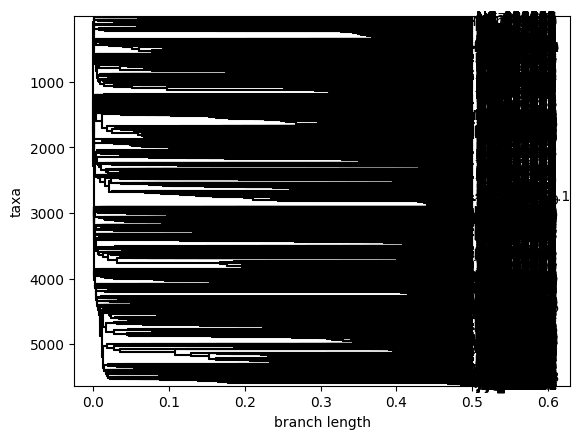

In [5]:
plt.figure(figsize=(10, 6))
Phylo.draw(tree, do_show=False)
plt.show()

In [7]:
print(tree.format("newick"))

((((NC_001942:0.49840,(NC_016564:0.49537,(NC_028998:0.04939,NC_029032:0.04931):0.44618):0.00268):0.00127,((NC_048022:0.49687,(NC_029002:0.03655,NC_008562:0.03645):0.46019):0.00184,((NC_009804:0.03604,NC_009803:0.03606):0.45865,(NC_048756:0.06030,(NC_048757:0.02104,NC_048637:0.02096):0.03932):0.43435):0.00384):0.00076):0.00022,((((NC_009817:0.49196,NC_010363:0.49224):0.00566,(NC_017732:0.47908,(NC_024149:0.44158,(NC_004814:0.42725,(((NC_049930:0.08401,NC_049931:0.08399):0.26047,((NC_025467:0.08663,(NC_071002:0.07374,(NC_049933:0.04891,NC_049932:0.04889):0.02506):0.01267):0.03507,(NC_049935:0.07652,((NC_049934:0.05896,NC_055866:0.05914):0.00587,(NC_028693:0.06081,((NC_049940:0.05004,NC_049939:0.05016):0.00360,(NC_049936:0.04761,(NC_049937:0.03118,(MK721197:0.02195,NC_049938:0.02195):0.00922):0.01633):0.00617):0.00704):0.00423):0.01156):0.04512):0.22261):0.06724,(((NC_047814:0.03430,NC_047813:0.03430):0.02008,(NC_070880:0.03126,NC_070879:0.03124):0.02325):0.22647,(NC_055802:0.08080,((NC_0

In [10]:
tree.find_any(name="NC_001942")


Clade(branch_length=0.4984049797, name='NC_001942')